# <span style="color:blue"> Esercizio 4
# 4.01
 
L'esercizio 4.01 richiede di aggiungere la possibilità di fari ripartire la simulazione dalla configurazione ottenuta nella simulazione precedente. Questa possibilità risulta particolarmente utile, in quanto permette di equilibrare il sistema, evitando il salto dell'energia cinetica (e in modo complementare dell'energia potenziale) visibile nei passi iniziali della *Simulazione 0*. Questo picco è dovuto al fatto che l'algoritmo fondamentale della simulazione, l'algoritmo di Verlet, che descrive l'evoluzione nella posizione delle particelle, è un algoritmo a due passi. Perciò per stimare la posizione [$\vec{r}(t+dt)$], non è sufficiente conoscere [$\vec{r}(t)$], ma anche [$\vec{r}(t-dt)$]. La stima della posizione $[\vec{r}(t-dt)]$ avviene a partire da una configurazione iniziale $[\vec{r}(t)]$ di tutte le particelle del sistema e attraverso un campionamento casuale uniforme delle velocità, tali da soddisfare la relazione $v^2=3 T$, con $T$ temperatura di input. 
Da queste ultime, [$\vec{r}(t-dt)$] viene ottenute come [$\vec{r}(t)-\vec{v_{casuale}}dt$] e in seguito viene avviata la simulazione attraverso l'algoritmo di Verlet. 
Questo procedimento, non solo, come detto in precedenza, causa l'instabilità iniziale della simulazione, ma obbliga ad inserire in input una temperatura maggiore di quella alla quale si vuole simulare il sistema attraverso vari tentativi. 
    
La ripartenza avviene secondo le seguenti modalità:
1. leggendo $\vec{r}(t)$ e $\vec{r}(t-dt)$ dai file di input ottenuti dalla simulazione precedente
2. calcolando $\vec{r}(t+dt)$ con un passo dell'algoritmo di Verlet; con $\vec{r}(t+dt)$ e $\vec{r}(t)$ ottenuti come $\vec{v}(t+dt/2)$;
3. riscalando le velocità al fine di ottenere la temperatura desiderata $T^\star$; $\vec{v}(t) \to \vec{v}_s(t)$
4. usando $\vec{v}_s(t)$ per stimare il passo precedente come: $\vec{r}_{new}(t) = \vec{r}(t+dt) - dt \vec{v}_s$
5. infine usando $\vec{r}_{new}(t)$ e $\vec{r}(t+dt)$ per avviare la simulazione
    
Il miglioramento della simulazione permette di decidere se ripartire e quante volte ripartire attraverso il file di input.

In seguito sono riportati i valori ottenuti da ripartenze successive al fine di mostrare l'equilibrazione del sistema. 
Le simulazioni sono state fatte con un numero di passi $M=1000$, stampando graficamente i valori ogni 10 passi.
La temperatura $T^\star$ è riportata insieme alle altre variabili di input della simulazione.
    
Infine, per facilitare la lettura dei valori del grafico sono stati stampati i valori istantanei iniziali e finali delle variabili di interesse nelle varie simulazioni. 

== Input ==
Temperature :  0.8
Number of particles :  108.0
Density :  1.1
Potential cut off :  2.2
Time step :  0.0005
 == Simulation 0 ==
 == Initial == == Final ==
E tot:  -6.65046 -6.58473
E pot:  -7.84084 -7.15776
E kin:  1.19039 0.573032
Temp:  0.793591 0.382022
 == Restart 1 ==
E tot:  -5.95408 -5.95115
E pot:  -7.13985 -6.86907
E kin:  1.18578 0.917914
Temp:  0.790518 0.611943
 == Restart 3 ==
E tot:  -5.56452 -5.56159
E pot:  -6.77608 -6.72265
E kin:  1.21156 1.16106
Temp:  0.807708 0.774041
 == Restart 5 ==
E tot:  -5.48166 -5.4807
E pot:  -6.68247 -6.7188
E kin:  1.20081 1.2381
Temp:  0.800542 0.825402


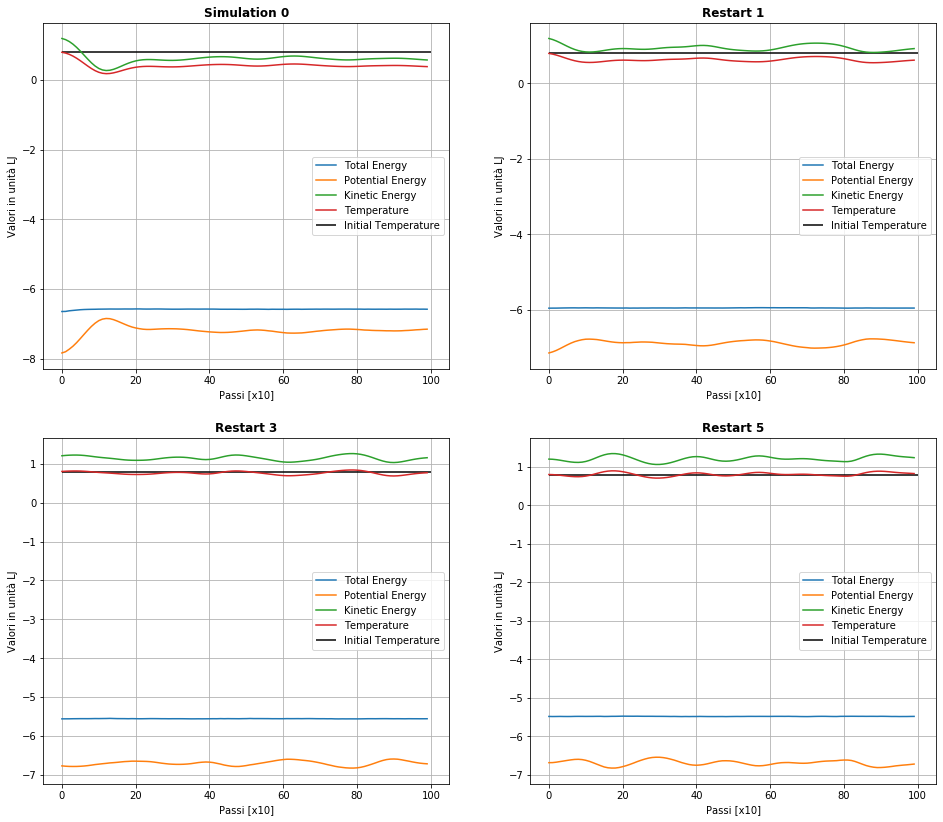

In [50]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(16,14))

#print initial conditions
init=np.loadtxt("ex_4.01/MD/input.dat", usecols=(0), unpack=True, max_rows=5)
print ("=================")
print ("=================")
print ("== Input ==")
print ("Temperature : ", init[0])
print ("Number of particles : ", init[1])
print ("Density : ", init[2])
print ("Potential cut off : ", init[3])
print ("Time step : ", init[4])
print ("=================")
print ("=================")

#Simulation 0 - results and graph
plt.subplot(221)
ytot=np.loadtxt("ex_4.01/MD/output_etot.dat", usecols=(0), unpack=True)
ypot=np.loadtxt("ex_4.01/MD/output_epot.dat", usecols=(0), unpack=True)
ykin=np.loadtxt("ex_4.01/MD/output_ekin.dat", usecols=(0), unpack=True)
ytemp=np.loadtxt("ex_4.01/MD/output_temp.dat", usecols=(0), unpack=True)

print(" == Simulation 0 ==")
print(" == Initial == == Final ==")
print ("E tot: ", ytot[0], ytot[ytot.size-1])
print ('E pot: ', ypot[0], ypot[ytot.size-1])
print ('E kin: ', ykin[0], ykin[ytot.size-1])
print ('Temp: ', ytemp[0], ytemp[ytot.size-1])

x = np.arange(ytot.size)

plt.plot(x, ytot, label= 'Total Energy')
plt.plot(x, ypot, label= 'Potential Energy')
plt.plot(x, ykin, label= 'Kinetic Energy')
plt.plot(x, ytemp, label= 'Temperature')
plt.title("Simulation 0", fontweight="bold")
plt.grid(True)
plt.hlines(init[0], 0, ytot.size, label='Initial Temperature')
plt.xlabel("Passi [x10]")
plt.ylabel("Valori in unità LJ")
plt.legend()


#Restart 1 - results and graph
plt.subplot(222)
ytot=np.loadtxt("ex_4.01/MD/output_etot1.dat", usecols=(0), unpack=True)
ypot=np.loadtxt("ex_4.01/MD/output_epot1.dat", usecols=(0), unpack=True)
ykin=np.loadtxt("ex_4.01/MD/output_ekin1.dat", usecols=(0), unpack=True)
ytemp=np.loadtxt("ex_4.01/MD/output_temp1.dat", usecols=(0), unpack=True)

print(" == Restart 1 ==")
print ("E tot: ", ytot[0], ytot[ytot.size-1])
print ('E pot: ', ypot[0], ypot[ytot.size-1])
print ('E kin: ', ykin[0], ykin[ytot.size-1])
print ('Temp: ', ytemp[0], ytemp[ytot.size-1])

x = np.arange(ytot.size)

plt.plot(x, ytot, label= 'Total Energy')
plt.plot(x, ypot, label= 'Potential Energy')
plt.plot(x, ykin, label= 'Kinetic Energy')
plt.plot(x, ytemp, label= 'Temperature')
plt.title("Restart 1", fontweight="bold")
plt.grid(True)
plt.hlines(init[0], 0, ytot.size, label='Initial Temperature')
plt.xlabel("Passi [x10]")
plt.ylabel("Valori in unità LJ")
plt.legend()

#Restart 3 - results and graph
plt.subplot(223)
ytot=np.loadtxt("ex_4.01/MD/output_etot3.dat", usecols=(0), unpack=True)
ypot=np.loadtxt("ex_4.01/MD/output_epot3.dat", usecols=(0), unpack=True)
ykin=np.loadtxt("ex_4.01/MD/output_ekin3.dat", usecols=(0), unpack=True)
ytemp=np.loadtxt("ex_4.01/MD/output_temp3.dat", usecols=(0), unpack=True)

print(" == Restart 3 ==")
print ("E tot: ", ytot[0], ytot[ytot.size-1])
print ('E pot: ', ypot[0], ypot[ytot.size-1])
print ('E kin: ', ykin[0], ykin[ytot.size-1])
print ('Temp: ', ytemp[0], ytemp[ytot.size-1])

x = np.arange(ytot.size)

plt.plot(x, ytot, label= 'Total Energy')
plt.plot(x, ypot, label= 'Potential Energy')
plt.plot(x, ykin, label= 'Kinetic Energy')
plt.plot(x, ytemp, label= 'Temperature')
plt.title("Restart 3", fontweight="bold")
plt.grid(True)
plt.hlines(init[0], 0, ytot.size, label='Initial Temperature')
plt.xlabel("Passi [x10]")
plt.ylabel("Valori in unità LJ")
plt.legend()

#Restart 5 - results and graph
plt.subplot(224)
ytot=np.loadtxt("ex_4.01/MD/output_etot5.dat", usecols=(0), unpack=True)
ypot=np.loadtxt("ex_4.01/MD/output_epot5.dat", usecols=(0), unpack=True)
ykin=np.loadtxt("ex_4.01/MD/output_ekin5.dat", usecols=(0), unpack=True)
ytemp=np.loadtxt("ex_4.01/MD/output_temp5.dat", usecols=(0), unpack=True)

print(" == Restart 5 ==")
print ("E tot: ", ytot[0], ytot[ytot.size-1])
print ('E pot: ', ypot[0], ypot[ytot.size-1])
print ('E kin: ', ykin[0], ykin[ytot.size-1])
print ('Temp: ', ytemp[0], ytemp[ytot.size-1])
print ("=================")
print ("=================")

x = np.arange(ytot.size)

plt.plot(x, ytot, label= 'Total Energy')
plt.plot(x, ypot, label= 'Potential Energy')
plt.plot(x, ykin, label= 'Kinetic Energy')
plt.plot(x, ytemp, label= 'Temperature')
plt.title("Restart 5", fontweight="bold")
plt.grid(True)
plt.hlines(init[0], 0, ytot.size, label='Initial Temperature')
plt.xlabel("Passi [x10]")
plt.ylabel("Valori in unità LJ")
plt.legend()
plt.show()

###### Commento: 
Come si può notare, alla prima ripartenza il sistema si assesta sotto il valore desiderato di temperatura, ma la caduta dell'energia cinetica risulta essere meno ripida della *simulazione 0*, dove le velocità sono campionate casualmente. Dalla terza simulazione invece i valori oscillano regolarmente attorno alla temperatura desiderata e il sistema può considerarsi equilibrato. 

# 4.02

Nel seguente esercizio si implementa il calcolo delle incertezze delle quattro quantità mostrate nei grafici dell'esercizio precedente. Per fare ciò, si suddividono gli step delle simulazioni in blocchi, per ognuno dei quali vengono stimati i valori medi di $\frac{E}{N}$, $\frac{U}{N}$, $\frac{K}{N}$ e $T$ con le loro incertezze, calcolate appunto con il metodo a blocchi.

Per fare ciò, è stata implementato nel file di input, la possibilità di inserire un numero diverso di passi per la simulazione finale, in modo da effettuare più velocemente le ripartenze per equilibrare il sistema e avere la possibilità di prolungare l'ultima simulazione, attraverso la quale calcolare i valori medi con le incertezze. 

In questo caso, sonon stati effettuate 5 simulazioni di 1000 passi ciascuna, con il metodo descritto nel paragrafo precedente, e infine una simulazione di $M=100000$ passi, divisi in $N=100$ blocchi di $L=1000$ passi ciascuna, calcolando i valori istantanei delle quantità in esame ogni 10 passi. 

Infine, in seguito sono graficate le quantità in funzione del numento $N$ di blocchi con le loro incertezze. 
    

== Input ==
Temperature :  0.8
Number of particles :  108.0
Density :  1.1
Potential cut off :  2.2
Time step :  0.0005
Potential Energy:  -6.67052  +-  0.00072064
Kinetic Energy:  1.19013  +-  0.000694816
Temperature:  0.793418  +-  0.00046321
Total Energy:  -5.48039  +-  8.02047e-05


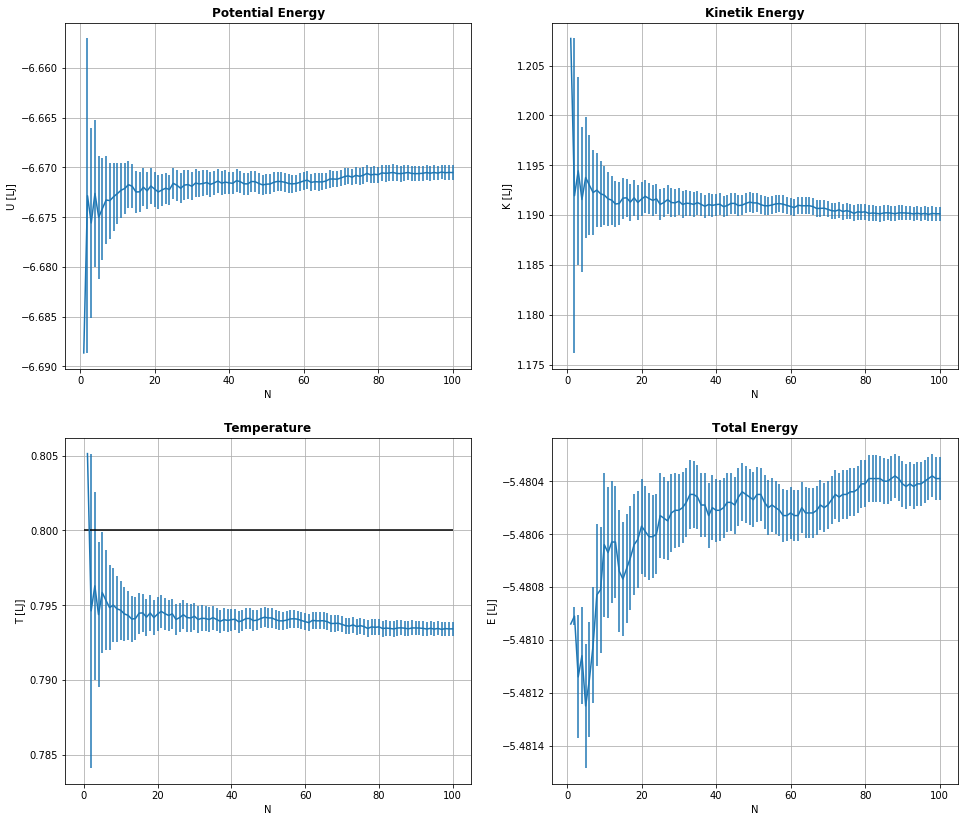

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#print initial conditions
init=np.loadtxt("ex_4.02/MD/input.dat", usecols=(0), unpack=True, max_rows=5)
print ("=================")
print ("=================")
print ("== Input ==")
print ("Temperature : ", init[0])
print ("Number of particles : ", init[1])
print ("Density : ", init[2])
print ("Potential cut off : ", init[3])
print ("Time step : ", init[4])
print ("=================")
print ("=================")


fig=plt.figure(figsize=(16,14))

plt.subplot(221)
x,y,err=np.loadtxt("ex_4.02/MD/ave_epot.out", usecols=(0, 1, 2), unpack=True)
print ("Potential Energy: ", y[y.size-1], " +- ", err[y.size-1])
plt.errorbar(x,y,yerr=err,)
plt.title("Potential Energy", fontweight="bold")
plt.xlabel("N")
plt.ylabel("U [LJ]")
plt.grid(True)

plt.subplot(222)
x,y,err=np.loadtxt("ex_4.02/MD/ave_ekin.out", usecols=(0, 1, 2), unpack=True)
print ("Kinetic Energy: ", y[y.size-1], " +- ", err[y.size-1])
plt.errorbar(x,y,yerr=err,)
plt.title("Kinetik Energy", fontweight="bold")
plt.xlabel("N")
plt.ylabel("K [LJ]")
plt.grid(True)

plt.subplot(223)
x,y,err=np.loadtxt("ex_4.02/MD/ave_temp.out", usecols=(0, 1, 2), unpack=True)
print ("Temperature: ", y[y.size-1], " +- ", err[y.size-1])
plt.errorbar(x,y,yerr=err,)
plt.title("Temperature", fontweight="bold")
plt.xlabel("N")
plt.ylabel("T [LJ]")
plt.grid(True)
plt.hlines(init[0], 0, y.size, label='Initial Temperature')

plt.subplot(224)
x,y,err=np.loadtxt("ex_4.02/MD/ave_etot.out", usecols=(0, 1, 2), unpack=True)
print ("Total Energy: ", y[y.size-1], " +- ", err[y.size-1])
plt.errorbar(x,y,yerr=err,)
plt.title("Total Energy", fontweight="bold")
plt.xlabel("N")
plt.ylabel("E [LJ]")
plt.grid(True)
plt.show()

# 4.03

L'ultima parte dell'esercizio consiste nell'utilizzare l'algoritmo di simulazione con le implementazioni fatte in precedenza per stimare i valori medi in unità SI di $\frac{E}{N}$, $\frac{U}{N}$, $\frac{K}{N}$, $T$ con le loro incertezze per un campione di Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu). 

Queste stime avvengono per 3 condizioni iniziali corrispondenti a tre fasi differenti: solida, liquida e gassosa.

Come fatto in precedenza, dopo 5 simulazioni di 1000 passi ciascuna, i valori sono stati calcolati con $M=200000$ passi e $N=100$ blocchi. 

In seguito sono mostrati i valori di input e graficati i risultati con le corrispondenti incertezze per ogni grandezza ripetuto per le 3 fasi.



== SOLID PHASE ==
== LJ units ==
Temperature :  0.8
Number of particles :  108.0
Density :  1.1
Potential cut off :  2.2
Time step :  0.0005
Potential Energy:  -1.10516e-20  +-  1.19394e-24 [J]
Kinetic Energy:  1.97178e-21  +-  1.15116e-24 [J]
Temperature:  95.2101  +-  0.0555852 [K]
Total Energy:  -9.07979e-21  +-  1.32881e-25 [J]


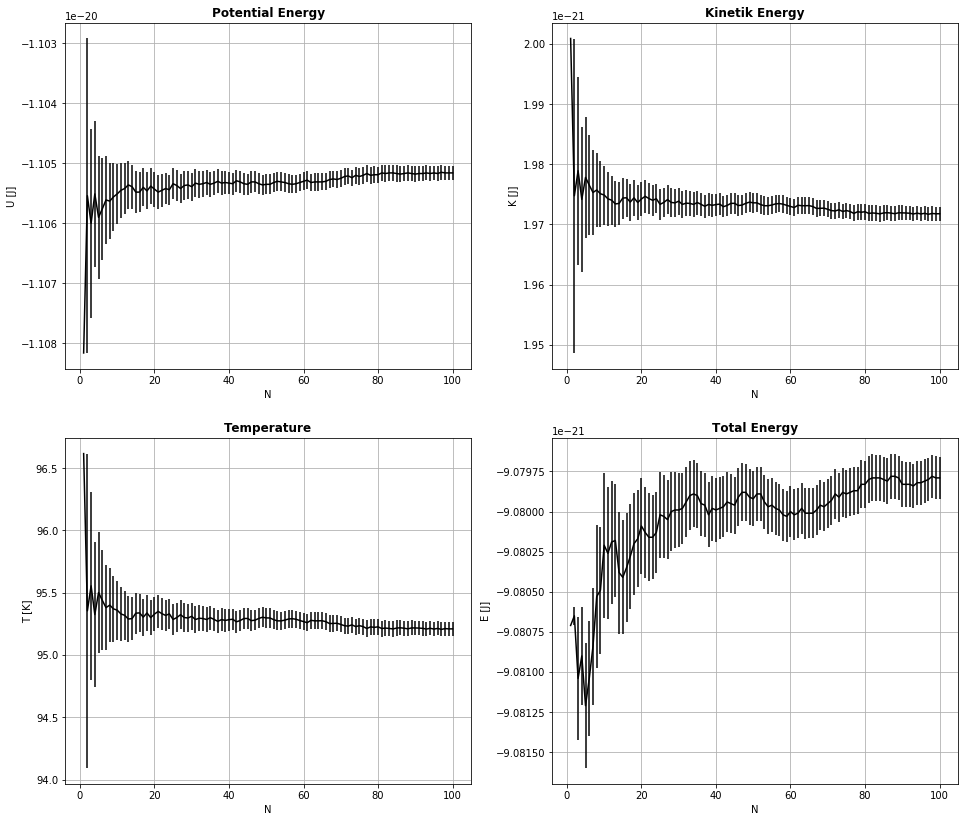

== LIQUID PHASE ==
== LJ units ==
Temperature :  1.1
Number of particles :  108.0
Density :  0.8
Potential cut off :  2.5
Time step :  0.0005
Potential Energy:  -8.30996e-21  +-  4.71889e-24 [J]
Kinetic Energy:  2.72738e-21  +-  4.61492e-24 [J]
Temperature:  131.695  +-  0.222838 [K]
Total Energy:  -5.58259e-21  +-  2.665e-25 [J]


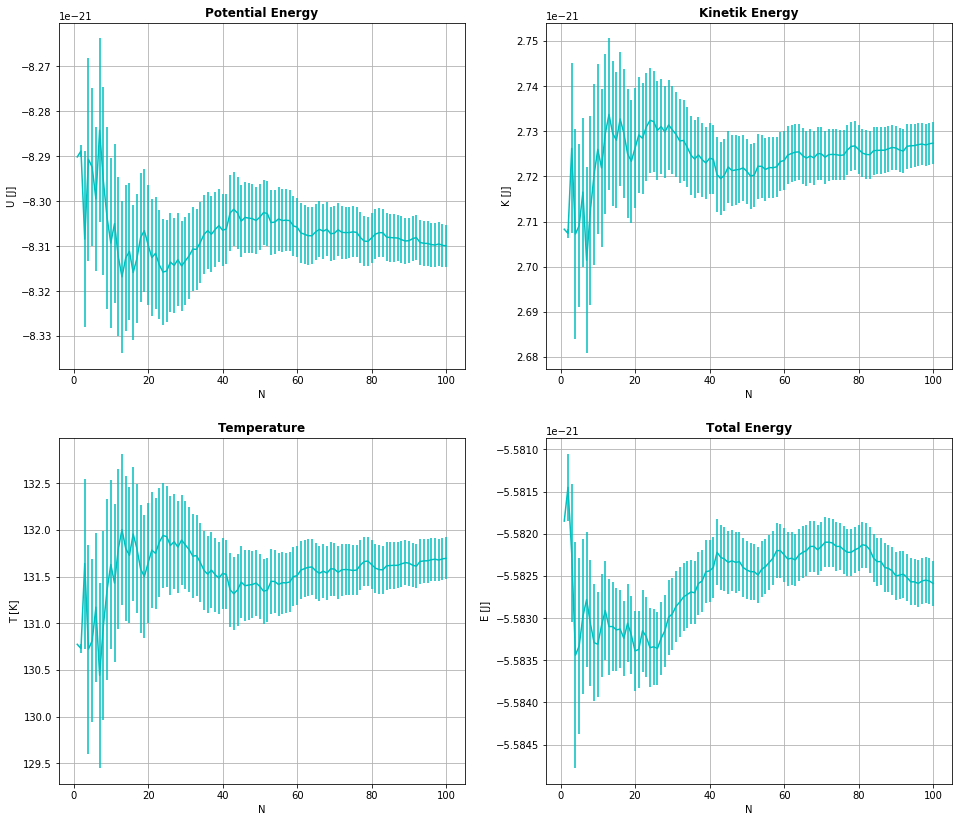

== GAS PHASE ==
== LJ units ==
Temperature :  1.2
Number of particles :  108.0
Density :  0.05
Potential cut off :  5.0
Time step :  0.0005
Potential Energy:  -6.78151e-22  +-  5.43367e-24 [J]
Kinetic Energy:  3.07682e-21  +-  5.42919e-24 [J]
Temperature:  148.569  +-  0.262157 [K]
Total Energy:  2.39867e-21  +-  1.29198e-26 [J]


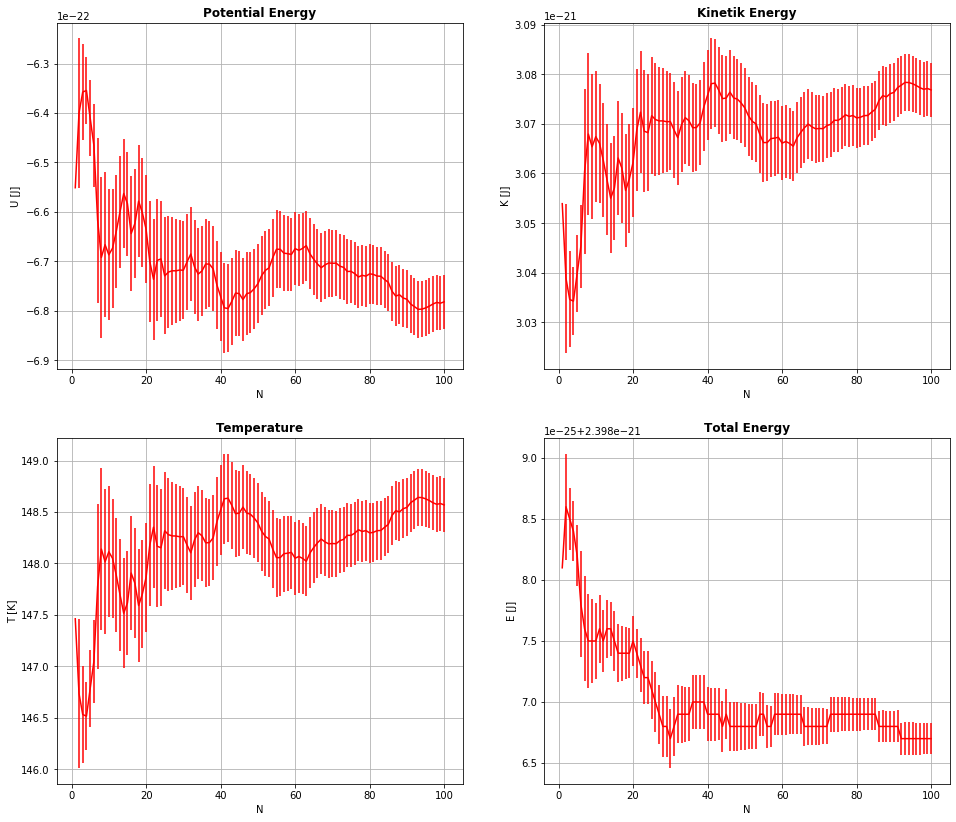

In [63]:
#############################################################
#SOLID PHASE 
#############################################################
#print initial conditions
init=np.loadtxt("ex_4.03/MD/input_complete.solid", usecols=(0), unpack=True, max_rows=5)
print ("=================")
print ("=================")
print ("== SOLID PHASE ==")
print ("== LJ units ==")
print ("Temperature : ", init[0])
print ("Number of particles : ", init[1])
print ("Density : ", init[2])
print ("Potential cut off : ", init[3])
print ("Time step : ", init[4])
print ("=================")
print ("=================")


fig=plt.figure(figsize=(16,14))

plt.subplot(221)
x,y,err=np.loadtxt("ex_4.03/MD/solid_out/ave_epot.out", usecols=(0, 1, 2), unpack=True)
print ("Potential Energy: ", y[y.size-1], " +- ", err[y.size-1], "[J]")
plt.errorbar(x,y,yerr=err, color="k")
plt.title("Potential Energy", fontweight="bold")
plt.xlabel("N")
plt.ylabel("U [J]")
plt.grid(True)

plt.subplot(222)
x,y,err=np.loadtxt("ex_4.03/MD/solid_out/ave_ekin.out", usecols=(0, 1, 2), unpack=True)
print ("Kinetic Energy: ", y[y.size-1], " +- ", err[y.size-1], "[J]")
plt.errorbar(x,y,yerr=err, color="k")
plt.title("Kinetik Energy", fontweight="bold")
plt.xlabel("N")
plt.ylabel("K [J]")
plt.grid(True)

plt.subplot(223)
x,y,err=np.loadtxt("ex_4.03/MD/solid_out/ave_temp.out", usecols=(0, 1, 2), unpack=True)
print ("Temperature: ", y[y.size-1], " +- ", err[y.size-1], "[K]")
plt.errorbar(x,y,yerr=err, color="k")
plt.title("Temperature", fontweight="bold")
plt.xlabel("N")
plt.ylabel("T [K]")
plt.grid(True)


plt.subplot(224)
x,y,err=np.loadtxt("ex_4.03/MD/solid_out/ave_etot.out", usecols=(0, 1, 2), unpack=True)
print ("Total Energy: ", y[y.size-1], " +- ", err[y.size-1], "[J]")
plt.errorbar(x,y,yerr=err, color="k")
plt.title("Total Energy", fontweight="bold")
plt.xlabel("N")
plt.ylabel("E [J]")
plt.grid(True)
plt.show()

#############################################################
#LIQUID PHASE 
#############################################################
#print initial conditions
init=np.loadtxt("ex_4.03/MD/input_complete.liquid", usecols=(0), unpack=True, max_rows=5)
print ("=================")
print ("=================")
print ("== LIQUID PHASE ==")
print ("== LJ units ==")
print ("Temperature : ", init[0])
print ("Number of particles : ", init[1])
print ("Density : ", init[2])
print ("Potential cut off : ", init[3])
print ("Time step : ", init[4])
print ("=================")
print ("=================")


fig=plt.figure(figsize=(16,14))

plt.subplot(221)
x,y,err=np.loadtxt("ex_4.03/MD/liquid_out/ave_epot.out", usecols=(0, 1, 2), unpack=True)
print ("Potential Energy: ", y[y.size-1], " +- ", err[y.size-1], "[J]")
plt.errorbar(x,y,yerr=err, color="c")
plt.title("Potential Energy", fontweight="bold")
plt.xlabel("N")
plt.ylabel("U [J]")
plt.grid(True)

plt.subplot(222)
x,y,err=np.loadtxt("ex_4.03/MD/liquid_out/ave_ekin.out", usecols=(0, 1, 2), unpack=True)
print ("Kinetic Energy: ", y[y.size-1], " +- ", err[y.size-1], "[J]")
plt.errorbar(x,y,yerr=err, color="c")
plt.title("Kinetik Energy", fontweight="bold")
plt.xlabel("N")
plt.ylabel("K [J]")
plt.grid(True)

plt.subplot(223)
x,y,err=np.loadtxt("ex_4.03/MD/liquid_out/ave_temp.out", usecols=(0, 1, 2), unpack=True)
print ("Temperature: ", y[y.size-1], " +- ", err[y.size-1], "[K]")
plt.errorbar(x,y,yerr=err, color="c")
plt.title("Temperature", fontweight="bold")
plt.xlabel("N")
plt.ylabel("T [K]")
plt.grid(True)


plt.subplot(224)
x,y,err=np.loadtxt("ex_4.03/MD/liquid_out/ave_etot.out", usecols=(0, 1, 2), unpack=True)
print ("Total Energy: ", y[y.size-1], " +- ", err[y.size-1], "[J]")
plt.errorbar(x,y,yerr=err, color="c")
plt.title("Total Energy", fontweight="bold")
plt.xlabel("N")
plt.ylabel("E [J]")
plt.grid(True)
plt.show()

#############################################################
#GAS PHASE 
#############################################################
#print initial conditions
init=np.loadtxt("ex_4.03/MD/input_complete.gas", usecols=(0), unpack=True, max_rows=5)
print ("=================")
print ("=================")
print ("== GAS PHASE ==")
print ("== LJ units ==")
print ("Temperature : ", init[0])
print ("Number of particles : ", init[1])
print ("Density : ", init[2])
print ("Potential cut off : ", init[3])
print ("Time step : ", init[4])
print ("=================")
print ("=================")


fig=plt.figure(figsize=(16,14))

plt.subplot(221)
x,y,err=np.loadtxt("ex_4.03/MD/gas_out/ave_epot.out", usecols=(0, 1, 2), unpack=True)
print ("Potential Energy: ", y[y.size-1], " +- ", err[y.size-1], "[J]")
plt.errorbar(x,y,yerr=err, color="r")
plt.title("Potential Energy", fontweight="bold")
plt.xlabel("N")
plt.ylabel("U [J]")
plt.grid(True)

plt.subplot(222)
x,y,err=np.loadtxt("ex_4.03/MD/gas_out/ave_ekin.out", usecols=(0, 1, 2), unpack=True)
print ("Kinetic Energy: ", y[y.size-1], " +- ", err[y.size-1], "[J]")
plt.errorbar(x,y,yerr=err, color="r")
plt.title("Kinetik Energy", fontweight="bold")
plt.xlabel("N")
plt.ylabel("K [J]")
plt.grid(True)

plt.subplot(223)
x,y,err=np.loadtxt("ex_4.03/MD/gas_out/ave_temp.out", usecols=(0, 1, 2), unpack=True)
print ("Temperature: ", y[y.size-1], " +- ", err[y.size-1], "[K]")
plt.errorbar(x,y,yerr=err, color="r")
plt.title("Temperature", fontweight="bold")
plt.xlabel("N")
plt.ylabel("T [K]")
plt.grid(True)


plt.subplot(224)
x,y,err=np.loadtxt("ex_4.03/MD/gas_out/ave_etot.out", usecols=(0, 1, 2), unpack=True)
print ("Total Energy: ", y[y.size-1], " +- ", err[y.size-1], "[J]")
plt.errorbar(x,y,yerr=err, color="r")
plt.title("Total Energy", fontweight="bold")
plt.xlabel("N")
plt.ylabel("E [J]")
plt.grid(True)
plt.show()